<a href="https://colab.research.google.com/github/SagarGuttal/Deep-Learning/blob/main/Flowerclassification_using_data_augmentation_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
print(tf.__version__)

2.8.2


In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file(origin = dataset_url, fname="flower_photos", untar=True)



228827136/228813984 [==============================] - 2s 0us/step


In [4]:
data_dir

'/root/.keras/datasets/flower_photos'

In [5]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [6]:
len(list(data_dir.glob("*/*.jpg")))

3670

In [7]:
roses = list(data_dir.glob("roses/*"))

In [8]:
roses[:2]

[PosixPath('/root/.keras/datasets/flower_photos/roses/14176042519_5792b37555.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/roses/3292434691_392071d702_n.jpg')]

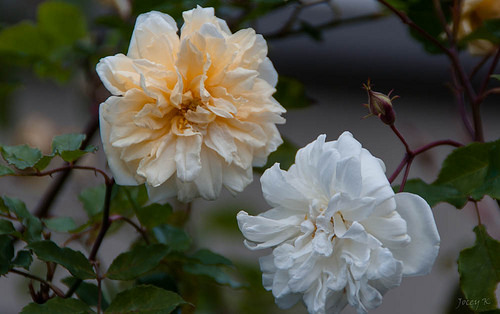

In [9]:
PIL.Image.open(str(roses[0]))

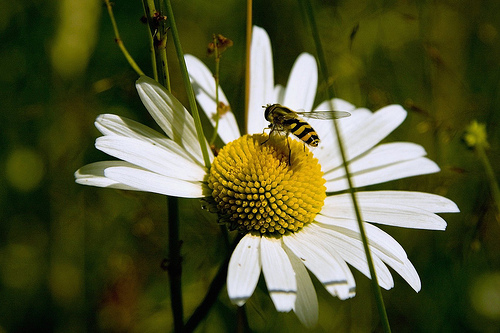

In [10]:
daisy = list(data_dir.glob("daisy/*"))

PIL.Image.open(str(daisy[4]))

In [11]:
flower_image_dict = {
    "roses":list(data_dir.glob('roses/*')),
    "daisy":list(data_dir.glob('daisy/*')),
    "dandelion":list(data_dir.glob('dandelion/*')),
    "sunflowers":list(data_dir.glob('sunflowers/*')),
    "tulips":list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_label_dict = {
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4
}

In [13]:
flower_image_dict["roses"][0]

PosixPath('/root/.keras/datasets/flower_photos/roses/14176042519_5792b37555.jpg')

In [14]:
str(flower_image_dict["roses"][0])

'/root/.keras/datasets/flower_photos/roses/14176042519_5792b37555.jpg'

In [15]:
import cv2

In [16]:
img = cv2.imread(str(flower_image_dict["roses"][0]))
img.shape

(314, 500, 3)

In [17]:
img = cv2.resize(img,(180,180))
img.shape

(180, 180, 3)

In [18]:
X, y = [],[]

for flower_name, images in flower_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_label_dict[flower_name])

In [19]:
X = np.array(X)
y = np.array(y) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


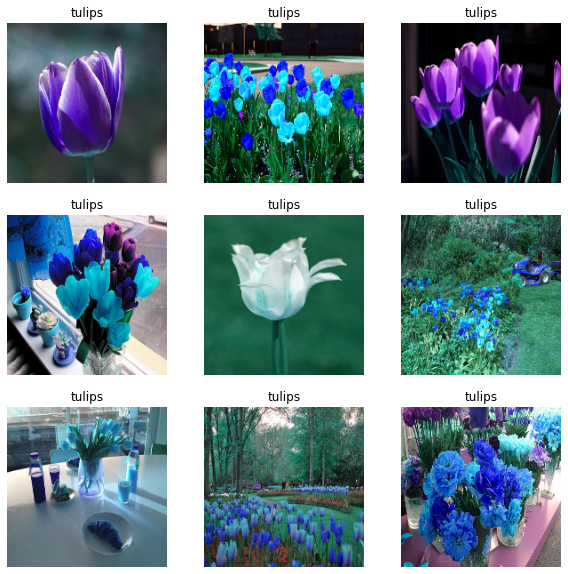

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for name, imgs in flower_image_dict.items():
  for i in range(9):
    img_read = cv2.imread(str(imgs[i]))
    rs_img = cv2.resize(img_read,(180,180))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(rs_img)
    plt.title(name)
    plt.axis("off")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [22]:
len(X_train)

2752

In [23]:
len(X_test)

918

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [26]:
model = Sequential([
    layers.Conv2D(16,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),

    layers.Dense(128, activation = 'relu'),
    layers.Dense(5) 
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

model.fit(X_train_scaled, y_train, epochs=30)



Epoch 1/30
86/86 [==============================] - 14s 24ms/step - loss: 1.3685 - accuracy: 0.4564
Epoch 2/30
86/86 [==============================] - 2s 23ms/step - loss: 0.9971 - accuracy: 0.6206
Epoch 3/30
86/86 [==============================] - 2s 23ms/step - loss: 0.8227 - accuracy: 0.6842
Epoch 4/30
86/86 [==============================] - 2s 23ms/step - loss: 0.6523 - accuracy: 0.7565
Epoch 5/30
86/86 [==============================] - 2s 23ms/step - loss: 0.4575 - accuracy: 0.8368
Epoch 6/30
86/86 [==============================] - 2s 23ms/step - loss: 0.3144 - accuracy: 0.8855
Epoch 7/30
86/86 [==============================] - 2s 24ms/step - loss: 0.1746 - accuracy: 0.9459
Epoch 8/30
86/86 [==============================] - 2s 24ms/step - loss: 0.0935 - accuracy: 0.9724
Epoch 9/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0880 - accuracy: 0.9767
Epoch 10/30
86/86 [==============================] - 2s 24ms/step - loss: 0.0570 - accuracy: 0.9869
Epoch 11

In [28]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 22ms/step - loss: 2.2150 - accuracy: 0.6275


[2.214982748031616, 0.6274510025978088]

Below prediction by linear predictions we have to convert it into probabilities of predictions (In output layer we use linear as activation)


In [29]:
predictions = model.predict(X_test_scaled)
predictions[0]

array([ 12.152913 ,  36.84132  ,   3.4424274, -10.460995 ,   4.2158437],
      dtype=float32)

Using softmax function we convert linear predictions to probability predictions for each class done by our model

In [30]:
probability_pre_of_each_class = tf.nn.softmax(predictions[0])
probability_pre_of_each_class

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.8965341e-11, 1.0000000e+00, 3.1264086e-15, 2.8632926e-21,
       6.7754081e-15], dtype=float32)>

Above values are probability predictions of each classes therefore we have to find class which have highest probability prediction using argmax function we retun index which has highest probability

In [31]:
#predict by model
prediction_for_first_test_image = np.argmax(np.array(probability_pre_of_each_class))
prediction_for_first_test_image

1

In [32]:
#Actual answer
y_test[0]

1

Out model still have Overfitting problem.. By doing data augmentation technique we reduce it

In [42]:
data_augmentation_zoom = keras.Sequential([
    tf.keras.layers.RandomZoom(0.9)
])

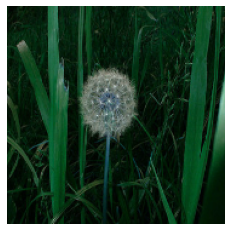

In [35]:
#Original image
plt.axis("off")
plt.imshow(X_train[0])

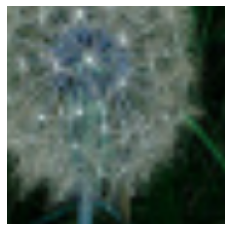

In [41]:
Random_zoomed_image = data_augmentation_zoom(X_train)
plt.axis("off")
plt.imshow(Random_zoomed_image[0].numpy().astype("uint8"))  #augmentated images are in tensor thats why we have to converted into numpy

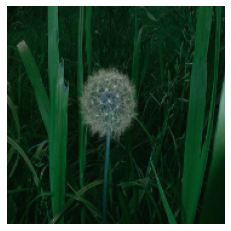

In [45]:
data_augmentation_constract = keras.Sequential([
    tf.keras.layers.RandomContrast(0.3)
])

Random_constracted_image = data_augmentation_constract(X_train)
plt.axis("off")
plt.imshow(Random_constracted_image[0].numpy().astype("uint8"))

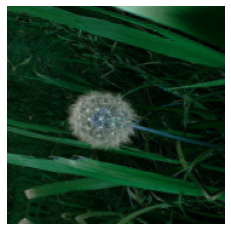

In [48]:
data_augmentation_rotation = keras.Sequential([
    tf.keras.layers.RandomRotation(0.3)
])

Random_rotation_image = data_augmentation_rotation(X_train)
plt.axis("off")
plt.imshow(Random_rotation_image[0].numpy().astype("uint8"))

Add data augmentation layer to model

In [49]:
data_augmentation = keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape=(180,180,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

In [50]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),

    layers.Dense(128, activation = 'relu'),
    layers.Dense(5,activation="sigmoid") 
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

model.fit(X_train_scaled, y_train, epochs=30)



Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


86/86 [==============================] - 4s 26ms/step - loss: 1.3770 - accuracy: 0.3993
Epoch 2/30
86/86 [==============================] - 2s 26ms/step - loss: 1.0843 - accuracy: 0.5654
Epoch 3/30
86/86 [==============================] - 2s 26ms/step - loss: 0.9814 - accuracy: 0.6185
Epoch 4/30
86/86 [==============================] - 2s 26ms/step - loss: 0.9219 - accuracy: 0.6464
Epoch 5/30
86/86 [==============================] - 2s 26ms/step - loss: 0.8773 - accuracy: 0.6548
Epoch 6/30
86/86 [==============================] - 2s 26ms/step - loss: 0.8691 - accuracy: 0.6592
Epoch 7/30
86/86 [==============================] - 2s 26ms/step - loss: 0.8120 - accuracy: 0.6842
Epoch 8/30
86/86 [==============================] - 2s 25ms/step - loss: 0.7527 - accuracy: 0.7122
Epoch 9/30
86/86 [==============================] - 2s 26ms/step - loss: 0.7341 - accuracy: 0.7151
Epoch 10/30
86/86 [==============================] - 2s 26ms/step - loss: 0.7454 - accuracy: 0.7108
Epoch 11/30
86/86 [=

In [51]:
model.evaluate(X_test_scaled, y_test)

 1/29 [>.............................] - ETA: 6s - loss: 0.9770 - accuracy: 0.7188

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


29/29 [==============================] - 1s 17ms/step - loss: 0.6964 - accuracy: 0.7538


[0.696414589881897, 0.7538126111030579]

In [53]:
model_summary = model.summary()
model_summary

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)      

In [56]:
predictions = model.predict(X_test_scaled)
predictions[5]

array([6.6995393e-03, 7.6630482e-07, 9.9879968e-01, 9.9999964e-01,
       9.9972373e-01], dtype=float32)

In [57]:
predicted_ans = np.argmax(predictions[5])
predicted_ans

3

In [59]:
y_test[5]

3

Lets predict test images and check

In [60]:
flowers_label = {
    0:"roses",
    1:"daisy",
    2:"dandelion",
    3:"sunflowers",
    4:"tulips"
}

In [1]:
plt.figure(figsize=(10,10))
for test_img in X_test_scaled:
  for i in range(10):
    ax = plt.subplot(4,3,i+1)
    predict_1 = predictions
    predict_1 = np.argmax(predict_1)
    plt.imshow(X_test_scaled[i])
    plt.xlabel(predict_1)
plt.show()

NameError: ignored